In [1]:
import torch
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from typing import Tuple
import torch
import torch.optim as optim
from model import Net
model = torch.load('model_weights/modelentire.pth')
model.load_state_dict(torch.load('model_weights/model.pth'))
loss_function = nn.MSELoss()
model.eval()

Net(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=1, bias=True)
)

In [2]:
def weighted_mse(u_exp: np.ndarray, u: np.ndarray, time: np.ndarray, eps: float = + 10 ** (-15)) -> Tuple[np.ndarray, np.ndarray]:
    dt = np.diff(time, n=1, axis=0)
    dt = np.append(dt, dt[-1])
    amplitude = np.dot(dt, u * u_exp) / np.dot(dt, u ** 2)
    e = (u_exp - amplitude * u) / (u_exp + eps) * dt
    
    loss = np.dot(e, e)
#     if (np.log(loss) == math.inf):
#         print('u_exp\n', u_exp)
#         print('u\n', u)
#         print('amplitude = ', amplitude)
#         print ('loss = ', loss)
#         sys.exit()
    return loss



t = 1e-3 * np.array([
    0.135, 0.180, 0.235, 0.315, 0.365, 0.420,
    0.485, 0.560, 0.650, 0.750, 0.865, 1.000,
    1.155, 1.335, 1.540, 1.780, 2.055, 2.370,
    2.740, 3.160, 3.650, 4.215, 4.870, 5.625,
    6.495, 7.500, 8.660, 10.00, 11.55, 13.34,
    15.40, 17.79, 20.54, 23.72, 27.39, 31.63,
    36.52, 42.17, 48.70, 56.24, 64.94, 74.99,
    86.60, 100.0, 115.5, 133.4
])

In [3]:
df = pd.read_pickle('Dataset')
df

,Sigma,mu,d,th,th0,Decay
19628,-1.271194,-0.747548,0.0,-1.085085,0.0,"[0.19375629692752577, 0.18294351872284478, 0.1..."
2486,-0.522897,0.229992,0.0,-0.732977,0.0,"[0.192993357268207, 0.1820247479384618, 0.1711..."
64883,1.436271,-0.737692,0.0,0.091825,0.0,"[0.1752133606610032, 0.16091191549296152, 0.14..."
10027,1.629299,1.329376,0.0,-1.526841,0.0,"[0.18759459262951242, 0.17560025481240513, 0.1..."
51126,0.423736,-0.777624,0.0,-0.247653,0.0,"[0.17945400597800243, 0.1659367937378173, 0.15..."
...,...,...,...,...,...,...
69892,0.814175,0.781662,0.0,-0.878862,0.0,"[0.1882601086365116, 0.17643418646482018, 0.16..."
72626,-0.020505,-0.181898,0.0,-0.651101,0.0,"[0.18716586487573802, 0.17512817120621807, 0.1..."
17249,0.133407,1.380844,0.0,0.863656,0.0,"[0.1928662308439771, 0.18225947646392704, 0.17..."
38159,1.210575,-0.099357,0.0,1.416446,0.0,"[0.1803007929163741, 0.16759557921691812, 0.15..."


In [4]:
# i = 0
# graph_df = df.iloc[0:1000]
# fix_str = graph_df.sample(1)
# #fix_vector = np.array([fix_str.get('Sigma').iloc[0], fix_str.get('mu').iloc[0], fix_str.get('th').iloc[0]])
# x = np.array([])
# y = np.array([])
# z = np.array([])
# r = np.array([])
# for _,row in graph_df.iterrows():
#     norm_2d = np.linalg.norm([fix_str.get('Sigma').iloc[0] - row['Sigma'],
#                             fix_str.get('mu').iloc[0] - row['mu'],
#                               fix_str.get('th').iloc[0] - row['th']])
#     #the_point = [row['Sigma'],row['mu'],row['th'],norm_2d]
#     #data_for_plotting.append(the_point)
#     x = np.append(x,row.get('Sigma'))
#     y = np.append(y, row.get('mu'))
#     z = np.append(z, row.get('th'))
#     r = np.append(r,norm_2d)
# print(len(x))

In [5]:
# x = x
# X,Y = np.meshgrid(x,y)
# Z,Y = np.meshgrid(z,y)
# V = np.sin(r)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# #ax.view_init(45,60)
# ax.plot_surface(X, Y, Z, facecolors=cm.Oranges(V))

In [7]:
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

device = get_device()
net = model.double().to(device)

# def appending_to_tensor(tensor, fix_vector, variable_vector):
#     tmp_tensor = torch.tensor([rand_2_strs.get('Sigma').iloc[0],rand_2_strs.get('Sigma').iloc[1],
#                                rand_2_strs.get('mu').iloc[0],rand_2_strs.get('mu').iloc[1],
#                                rand_2_strs.get('th').iloc[0],rand_2_strs.get('th').iloc[1],
#                                np.log(weighted_mse(np.array(rand_2_strs.get('Decay').iloc[0]),np.array(rand_2_strs.get('Decay').iloc[1]),t)[0])])
#     tmp_tensor = torch.unsqueeze(tmp_tensor, 0)
#     tmp_tensor = torch.cat((tensor,tmp_tensor),0)
#     return(tmp_tensor)

def mean_absolute_percentage_error(y_pred, y_true, eps=10**(-2)): 
    return abs(torch.mean(((y_true-y_pred))/(y_true + eps)))*100


# def create_batches_to_device(df, device, num_fix_string,batch_size=1):
#     tensor = torch.tensor([])
#     fix_vector = 
#     variable_vector = 
#     tensor = appending_to_tensor(tensor, rand_train_str)
#     tensor = tensor.to(device)
#     trainset = torch.utils.data.DataLoader(tensor, batch_size=batch_size, shuffle=True)
#     return (trainset)
print(device)


def l2_norm(variable_vector):
    return np.linalg.norm([fix_vector.get('Sigma').iloc[0] - variable_vector[0],
                          fix_vector.get('mu').iloc[0] - variable_vector[1],
                          fix_vector.get('th').iloc[0] - variable_vector[2]])

def L(variable_vector):
    tensor = torch.tensor([fix_vector.get('Sigma').iloc[0],variable_vector[0],
                           fix_vector.get('mu').iloc[0],variable_vector[1],
                           fix_vector.get('th').iloc[0],variable_vector[2]])
    tensor = tensor.to(device)
    #print(tensor)
    #data_batch = torch.utils.data.DataLoader(tensor, batch_size=1, shuffle=False)
    #print(data_batch)
#     for data in data_batch:
#         X = data
#         print(X)
#         output = net(X.double())
#         print (output)
    output = net(tensor.double())
    #print (output.item())
    return (np.exp(output.item()))

constant = 1

def minimization_func(variable_vector):
    #variable_vector = [Sigma2, mu2, th2]
    return (-1 * l2_norm(variable_vector) + constant * L(variable_vector) )

print ('одинаковые параметры loss = ', L([fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]]))
print ('одинаковые параметры l2_norm =', l2_norm([fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]]))
print ('одинаковые параметры minim = ', minimization_func([fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]]))

C:\ProgramData\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


cpu


NameError: name 'fix_vector' is not defined

In [9]:
#fix_vector = df.sample(1) временно
fix_vector = df.loc[9030]
fix_vector = pd.DataFrame(fix_vector).transpose()
print ('Зафиксировали произвольный вектор из датафрейма с компонентами \n')
fix_vector

Зафиксировали произвольный вектор из датафрейма с компонентами 



,Sigma,mu,d,th,th0,Decay
9030,-0.809753,-1.56861,0,-0.248755,0,"[0.17439216402987712, 0.15983478220067351, 0.1..."


### Нахождение границ для оптимизатора с учетом параметров усреднения первоначальной выборки

In [5]:
means = np.fromfile('means_scaler')
print(means)
stds = np.fromfile('stds_scaler')
print(stds)
a = [[stds[0]]]
b = [[1e+06-means[0]]]
sigma_min = np.linalg.solve(a,b)
print('Sigma lower bound',sigma_min)
a = [[stds[1]]]
b = [[10-means[1]]]
mu_min = np.linalg.solve(a,b)
print ('mu lower bound', mu_min)
a = [[stds[3]]]
b = [[0.650209-means[3]]]
th_min = np.linalg.solve(a,b)
print ('th lower bound', th_min)

a = [[stds[0]]]
b = [[10e+06-means[0]]]
sigma_max = np.linalg.solve(a,b)
print('Sigma upper bound',sigma_max)
a = [[stds[1]]]
b = [[150-means[1]]]
mu_max = np.linalg.solve(a,b)
print ('mu upper bound', mu_max)
a = [[stds[3]]]
b = [[11.7-means[3]]]
th_max = np.linalg.solve(a,b)
print ('th upper bound', th_max)

[5.49793364e+06 8.00354882e+01 8.90000000e+01 6.18313815e+00
 6.50000000e+00]
[2.58728391e+06 4.04162034e+01 1.00000000e+00 3.19023924e+00
 1.00000000e+00]
Sigma lower bound [[-1.73847703]]
mu lower bound [[-1.73285668]]
th lower bound [[-1.73433048]]
Sigma upper bound [[1.74007435]]
mu upper bound [[1.73110055]]
th upper bound [[1.72929409]]


## Минимизация логарифмических величин

In [11]:
constant = 1000
from scipy.optimize import minimize
x0 = np.array([fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]])
#res = minimize(minimization_func, x0, method='nelder-mead')
# res = minimize(minimization_func, x0, method='BFGS',options={'disp': True, 'eps':1e-6, 'gtol':1e1})
#res = minimize(minimization_func, x0, method='BFGS',options={'disp': True})
#res = minimize(minimization_func, x0, method='CG',options={'disp': True, 'maxiter':100000})
#res = minimize(minimization_func, x0, method='powell')
res =  minimize(minimization_func, x0, method='SLSQP', bounds=((sigma_min[0][0], sigma_max[0][0]),(mu_min[0][0], mu_max[0][0]),(th_min[0][0],th_max[0][0])),options={'disp': True})
#print(res)
print ('Start vector', [fix_vector.get('Sigma').iloc[0],fix_vector.get('mu').iloc[0],fix_vector.get('th').iloc[0]])
print ('Vector after minimization', res.x)
print ('Function value with start vector', minimization_func(x0))
print ('How % change loss', mean_absolute_percentage_error(torch.tensor(L(res.x)), torch.tensor(L(x0))).item())
print ('L2 norm with minim vector', l2_norm(res.x))

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.280428700028562
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12
Start vector [-0.8097534630349149, -1.5686084526495365, -0.24875458646855458]
Vector after minimization [-1.46126883  1.73110055 -1.20922686]
Function value with start vector 0.7328583265480395
How % change loss 4.5149003309799935
L2 norm with minim vector 3.4978648826855325


## Проверяю нейросеть на сходимость

In [509]:
i = total_iter = 10
fix_vector = df.sample(1)
while(i >= 0):
    variable_vector = [fix_vector.get('Sigma').iloc[0] + (i/total_iter * fix_vector.get('Sigma').iloc[0]) ,fix_vector.get('mu').iloc[0] + (i/total_iter * fix_vector.get('mu').iloc[0]),fix_vector.get('th').iloc[0] + (i/total_iter * fix_vector.get('th').iloc[0])]
    print ('Loss is', L(variable_vector))
    i -= 1

Loss is 0.017157855027261613
Loss is 0.012227208247171543
Loss is 0.009077916284112217
Loss is 0.006459419488012133
Loss is 0.004043312465918588
Loss is 0.002492173151506337
Loss is 0.0013419683164918657
Loss is 0.0006564899268535414
Loss is 0.00027265027575578603
Loss is 5.5403060777426065e-05
Loss is 5.484248134522269e-06


In [12]:
the_result_vector = fix_vector[['Sigma', 'mu', 'd', 'th', 'th0']].copy()
the_result_vector.loc['minimize_vector'] = [res.x[0], res.x[1], 0, res.x[2], 0]
the_result_vector = the_result_vector*stds+means
the_result_vector.to_pickle('the_result_vectors_to_compare')
the_result_vector

,Sigma,mu,d,th,th0
9030,3.40287e+06,16.6383,89,5.38955,6.5
minimize_vector,1.71722e+06,150,89,2.32542,6.5


In [13]:
[the_result_vector['Sigma'].iloc[0],the_result_vector['Sigma'].iloc[1],the_result_vector['mu'].iloc[0],the_result_vector['mu'].iloc[1],
 the_result_vector['th'].iloc[0],the_result_vector['th'].iloc[1]]

[3402871.538234493,
 1717216.3179786229,
 16.638289933069103,
 149.99999998226664,
 5.389551505199457,
 2.325415178215014]

## Отошли от нейронки. Занимаемся минимизацией через модельную функцию

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from common import tool_times
from common import well_construction as wc
from common.sensor_types import sensors
from solvers.solver_cim_py.interface import Solver


tmp_vector = df.sample(1)
fix_vector = tmp_vector[['Sigma', 'mu', 'd', 'th', 'th0']]
fix_vector = fix_vector*stds+means
fix_vector['Decay'] = tmp_vector['Decay']
print ('Зафиксировали произвольный вектор из датафрейма с компонентами \n')
fix_vector

Зафиксировали произвольный вектор из датафрейма с компонентами 



,Sigma,mu,d,th,th0,Decay
37135,5.821289e+06,101.798129,89.0,5.862834,6.5,"[0.19024090955881282, 0.17885688326302107, 0.1..."


In [7]:
def model_decay(d=fix_vector.get('d').iloc[0], th0=fix_vector.get('th0').iloc[0],
                th=fix_vector.get('th').iloc[0], sigma=fix_vector.get('Sigma').iloc[0], mu=fix_vector.get('mu').iloc[0]):
    tubes = [
    wc.Tube(d=d, th0=th0, th=th, sigma=sigma, mu=mu),
    ]

    sensor = sensors.PULSE_3E_1
    times = tool_times.times[sensor]
    solver = Solver(sensor, times, tool_averaging=True)
    output = solver.get_curve(tubes)
    return(output)

In [8]:
def l2_norm(variable_vector):
    return np.linalg.norm([fix_vector.get('Sigma').iloc[0] - variable_vector[0],
                          fix_vector.get('mu').iloc[0] - variable_vector[1],
                          fix_vector.get('th').iloc[0] - variable_vector[2]])

def L(variable_vector):
    return (weighted_mse(np.array(fix_vector.get('Decay').iloc[0]), np.array(model_decay(sigma=variable_vector[0],
                                                                             mu=variable_vector[1],
                                                                            th=variable_vector[2])),t))
def minimization_func(variable_vector, constant=1):
    #variable_vector = [Sigma2, mu2, th2]
    return (-1 * l2_norm(variable_vector) + constant * L(variable_vector) )

### 2D minimization_func (sigma/mu) surface

In [9]:
def l2_norm(x,y):#sigma/mu
    return np.linalg.norm([fix_vector.get('Sigma').iloc[0] - x,
                          fix_vector.get('mu').iloc[0] - y])

def L(x,y):
    return (weighted_mse(np.array(fix_vector.get('Decay').iloc[0]), np.array(model_decay(sigma=x,
                                                                             mu=y)),t))
def minimization_func(x,y, constant=1):
    #variable_vector = [Sigma, mu]
    return (-1 * l2_norm(x,y) + constant * L(x,y) )

In [10]:
size = 10
x = np.linspace(-2 * fix_vector.get('Sigma').iloc[0], 2 * fix_vector.get('Sigma').iloc[0], size)#sigma
y = np.linspace(-2 * fix_vector.get('mu').iloc[0], 2 * fix_vector.get('mu').iloc[0], size)#mu
i = 0
j = 0
z = np.zeros((size,size))
while (i < size):
    while (j < size):
        z[i][j] = minimization_func(x[i],y[j])
        j = j + 1
    j = 0
    i = i + 1
#Z = minimization_func(X,Y)

2021-02-05 21:01:44 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:01:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:01:44 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:01:44 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=-11642578.753352998, mu=-203.59625784777214),]
2021-02-05 21:01:44 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:01:45 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:01:45 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
<ipython-input-2-57651b7c9b59>:4: RuntimeWarning: overflow encountered in square
  amplitude = np.dot(dt, u * u_exp) / np.dot(dt, u ** 2)
2021-02-05 21:

2021-02-05 21:01:58 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:01:59 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:01:59 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:01:59 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:01:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:01:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:01:59 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=-9055339.030385666, mu=-203.59625784777214),]
2021-02-05 21:01:59 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:02:01 INFO    : multi-lu-coil-

2021-02-05 21:02:16 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=-9055339.030385666, mu=203.59625784777214),]
2021-02-05 21:02:16 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:02:17 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:02:17 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:02:17 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:02:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:02:17 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:02:17 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, si

2021-02-05 21:02:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:02:33 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:02:33 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=-6468099.307418332, mu=203.59625784777214),]
2021-02-05 21:02:33 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:02:35 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:02:35 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:02:35 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:02:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:02:35 INFO    : multi-lu-c

2021-02-05 21:02:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:02:50 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:02:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:02:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:02:50 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=-3880859.5844509993, mu=203.59625784777214),]
2021-02-05 21:02:50 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:02:52 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:02:52 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:02:52 INFO    : multi-lu-coil-modelling, (interface

2021-02-05 21:03:05 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:03:06 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:03:06 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:03:06 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:03:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:03:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:03:06 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=-1293619.861483667, mu=203.59625784777214),]
2021-02-05 21:03:06 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:03:08 INFO    : multi-lu-coil-m

2021-02-05 21:03:22 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=1293619.8614836652, mu=158.35264499271167),]
2021-02-05 21:03:22 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:03:23 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:03:23 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:03:23 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:03:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:03:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:03:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, si

2021-02-05 21:03:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:03:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:03:38 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=3880859.5844509993, mu=158.35264499271167),]
2021-02-05 21:03:38 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:03:40 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:03:40 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:03:40 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:03:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:03:40 INFO    : multi-lu-c

2021-02-05 21:03:54 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:03:54 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:03:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:03:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:03:54 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=6468099.30741833, mu=158.35264499271167),]
2021-02-05 21:03:54 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:03:56 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:03:56 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:03:56 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-05 21:04:08 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:04:09 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:04:09 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:04:09 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:04:09 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:04:09 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:04:09 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=9055339.030385664, mu=158.35264499271167),]
2021-02-05 21:04:09 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:04:11 INFO    : multi-lu-coil-mo

2021-02-05 21:04:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, sigma=11642578.753352998, mu=113.10903213765121),]
2021-02-05 21:04:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 21:04:24 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 21:04:24 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 21:04:24 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 21:04:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 21:04:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 21:04:24 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=5.862833610145759, th0=6.5, si

In [38]:
# Read data from a csv
z_data = pd.DataFrame(z)
fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='minimimzation_function(Sigma,mu)', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(
xaxis_title = 'sigma',
yaxis_title = 'mu',
zaxis_title = 'minimimzation_function(sigma/mu)'))
fig.show()

### Heatmap loss ( log (sigma), log (mu), log(d), log(th), log(th0)

In [65]:
def model_decay(d=fix_vector.get('d').iloc[0], th0=fix_vector.get('th0').iloc[0],
                th=fix_vector.get('th').iloc[0], sigma=fix_vector.get('Sigma').iloc[0], mu=fix_vector.get('mu').iloc[0]):
    tubes = [
    wc.Tube(d=(d), th0=(th0), th=(th), sigma=(sigma), mu=(mu)),
    ]

    sensor = sensors.PULSE_3E_1
    times = tool_times.times[sensor]
    solver = Solver(sensor, times, tool_averaging=True)
    output = solver.get_curve(tubes)
    return(output)
def L(x,y):
    return np.log(weighted_mse(np.array(model_decay()), np.array(model_decay(sigma=x,
                                                                             mu=y)),t))

In [66]:
size = 10
x = np.linspace(1e-5, 2 * fix_vector.get('Sigma').iloc[0], size)#sigma
y = np.linspace(1e-5, 2 * fix_vector.get('mu').iloc[0], size)#mu
i = 0
j = 0
loss = np.zeros((size,size))
while (i < size):
    while (j < size):
        loss[i][j] = L(x[i],y[j])
        j = j + 1
    j = 0
    i = i + 1

2021-02-05 20:16:35 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:16:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:16:35 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:16:35 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:16:35 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:16:37 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:16:37 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:16:37 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:16:37 INFO    : multi-lu-coil-

2021-02-05 20:16:51 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:16:51 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:16:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:16:51 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:16:51 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:16:51 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:16:52 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:16:52 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:16:52 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-05 20:17:07 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:17:07 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:17:07 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:17:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:17:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:17:07 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:17:07 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:17:08 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:17:08 INFO    : multi-lu-coil-mod

2021-02-05 20:17:21 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:17:22 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:17:22 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:17:22 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:17:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:17:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:17:22 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:17:22 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:17:24 INFO    : multi-lu-coil-mo

2021-02-05 20:17:36 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=1823406.1248993305, mu=257.8086358076115),]
2021-02-05 20:17:36 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:17:38 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:17:38 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:17:38 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:17:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:17:38 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:17:38 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sig

2021-02-05 20:17:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:17:52 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:17:52 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=3646812.249788661, mu=114.58162147004957),]
2021-02-05 20:17:52 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:17:53 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:17:53 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:17:53 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:17:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:17:53 INFO    : multi-lu-co

2021-02-05 20:18:07 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:18:08 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:18:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:18:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:18:08 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=3646812.249788661, mu=257.8086358076115),]
2021-02-05 20:18:08 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:18:09 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:18:09 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:18:09 INFO    : multi-lu-coil-modelling, (interface.py

2021-02-05 20:18:21 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:18:23 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:18:23 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:18:23 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:18:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:18:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:18:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=5470218.374677991, mu=114.58162147004957),]
2021-02-05 20:18:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:18:24 INFO    : multi-lu-coil-mo

2021-02-05 20:18:37 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:18:37 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:18:39 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:18:39 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:18:39 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:18:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:18:39 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:18:39 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sig

2021-02-05 20:18:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:18:53 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:18:53 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:18:53 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:18:54 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:18:54 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:18:54 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:18:54 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:18:54 INFO    : multi-lu-co

2021-02-05 20:19:08 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:19:08 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:19:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:19:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:19:08 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:19:08 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:19:10 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:19:10 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:19:10 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-05 20:19:22 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:19:24 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:19:24 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:19:24 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:19:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:19:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:19:24 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:19:24 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:19:26 INFO    : multi-lu-coil-mo

2021-02-05 20:19:38 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=9117030.624456653, mu=229.16323294009914),]
2021-02-05 20:19:38 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:19:40 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:19:40 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:19:40 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:19:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:19:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:19:40 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sig

2021-02-05 20:19:55 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:19:55 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:19:55 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=10940436.749345982, mu=85.93621860253718),]
2021-02-05 20:19:55 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:19:57 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:19:57 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:19:57 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:19:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:19:57 INFO    : multi-lu-co

2021-02-05 20:20:11 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:20:11 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:20:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:20:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:20:11 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=10940436.749345982, mu=229.16323294009914),]
2021-02-05 20:20:11 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:20:13 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:20:13 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:20:13 INFO    : multi-lu-coil-modelling, (interface.

2021-02-05 20:20:26 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:20:28 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:20:28 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:20:28 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:20:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:20:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:20:28 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=12763842.874235313, mu=85.93621860253718),]
2021-02-05 20:20:28 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:20:29 INFO    : multi-lu-coil-mo

2021-02-05 20:20:43 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:20:43 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:20:44 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:20:45 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:20:45 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:20:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:20:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:20:45 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sig

2021-02-05 20:20:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:20:59 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:20:59 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:20:59 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:21:01 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:21:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:21:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:21:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:21:01 INFO    : multi-lu-co

2021-02-05 20:21:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:21:15 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:21:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:21:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:21:15 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:21:15 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:21:16 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:21:16 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:21:17 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-05 20:21:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:21:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:21:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=8205327.562006988, mu=128.90431790380575),]
2021-02-05 20:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:21:32 INFO    : multi-lu-coil-mo

2021-02-05 20:21:45 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, sigma=16410655.124013975, mu=200.51783007258675),]
2021-02-05 20:21:45 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 20:21:46 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 20:21:46 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 20:21:46 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 20:21:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 20:21:46 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 20:21:46 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=11.45124626576759, th0=6.5, si

In [11]:
log_loss = pd.DataFrame(loss)
log_loss.index = np.around(x,1) 
log_loss.columns = np.around(y,3)
log_loss

NameError: name 'loss' is not defined

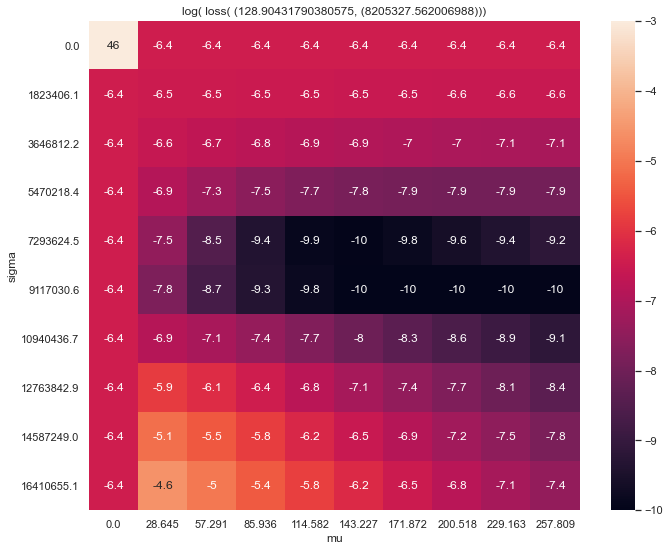

In [98]:
import seaborn as sns; sns.set_theme()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(log_loss, annot=True, vmin=-10, vmax=-3)
name = 'log( loss( (' + str(fix_vector.get('mu').iloc[0])+ ', (' + str(fix_vector.get('Sigma').iloc[0]) + ')))'
ax.set(xlabel='mu', ylabel='sigma', title=name)
f.savefig("loss((Sigma), (mu))")

### 2D loss(sigma/th)

In [33]:
def l2_norm(x,y):#sigma/th
    return np.linalg.norm([fix_vector.get('Sigma').iloc[0] - x,
                          fix_vector.get('th').iloc[0] - y])

def L(x,y):
    return (weighted_mse(np.array(fix_vector.get('Decay').iloc[0]), np.array(model_decay(sigma=x,
                                                                             th=y)),t))
def minimization_func(x,y, constant=1):
    #variable_vector = [Sigma, th]
    return (-1 * l2_norm(x,y) + constant * L(x,y) )

size = 10
x = np.linspace(-2 * fix_vector.get('Sigma').iloc[0], 2 * fix_vector.get('Sigma').iloc[0], size)#sigma
y = np.linspace(-2 * fix_vector.get('th').iloc[0], 2 * fix_vector.get('th').iloc[0], size)#mu
i = 0
j = 0
z = np.zeros((size,size))
while (i < size):
    while (j < size):
        z[i][j] = minimization_func(x[i],y[j])
        j = j + 1
    j = 0
    i = i + 1
#Z = minimization_func(X,Y)

2021-02-05 17:21:13 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:21:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:21:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:21:13 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=-22.90249253153518, th0=6.5, sigma=-16410655.124013975, mu=128.90431790380575),]
2021-02-05 17:21:13 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:21:15 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:21:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
<ipython-input-2-57651b7c9b59>:4: RuntimeWarning:

overflow encountered in square

2021-02-05 17:21:15 INFO    : multi-lu-coil-modelling, (interface.py 

2021-02-05 17:21:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:21:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:21:31 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=-22.90249253153518, th0=6.5, sigma=-12763842.874233091, mu=128.90431790380575),]
2021-02-05 17:21:31 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:21:33 INFO    : multi-lu-coil

2021-02-05 17:21:48 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, sigma=-12763842.874233091, mu=128.90431790380575),]
2021-02-05 17:21:48 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:21:50 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:21:50 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:21:50 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:21:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:21:50 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:21:50 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=-22.90249253153518, th0=6.5, 

2021-02-05 17:22:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:22:06 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:22:06 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, sigma=-9117030.624452207, mu=128.90431790380575),]
2021-02-05 17:22:06 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:22:08 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:22:08 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:22:08 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:22:08 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:22:08 INFO    : multi-lu-c

2021-02-05 17:22:23 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:22:23 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:22:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:22:23 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:22:23 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, sigma=-5470218.374671325, mu=128.90431790380575),]
2021-02-05 17:22:23 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:22:25 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:22:25 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:22:25 INFO    : multi-lu-coil-modelling, (interface.

2021-02-05 17:22:38 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:22:40 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:22:40 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:22:40 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:22:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:22:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:22:40 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, sigma=-1823406.124890441, mu=128.90431790380575),]
2021-02-05 17:22:40 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:22:41 INFO    : multi-lu-coil-m

2021-02-05 17:22:55 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, sigma=1823406.124890443, mu=128.90431790380575),]
2021-02-05 17:22:55 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:22:56 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:22:56 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:22:56 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:22:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:22:56 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:22:56 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, si

2021-02-05 17:23:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:23:11 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:23:11 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, sigma=5470218.374671325, mu=128.90431790380575),]
2021-02-05 17:23:11 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:23:13 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:23:13 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:23:13 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:23:13 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:23:13 INFO    : multi-lu-c

2021-02-05 17:23:28 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:23:28 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:23:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:23:28 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:23:28 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, sigma=9117030.624452211, mu=128.90431790380575),]
2021-02-05 17:23:28 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:23:30 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:23:30 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:23:30 INFO    : multi-lu-coil-modelling, (interface.

2021-02-05 17:23:43 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:23:45 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:23:45 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:23:45 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:23:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:23:45 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:23:45 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, sigma=12763842.874233093, mu=128.90431790380575),]
2021-02-05 17:23:45 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:23:46 INFO    : multi-lu-coil-

2021-02-05 17:23:59 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=12.723606961963988, th0=6.5, sigma=16410655.124013975, mu=128.90431790380575),]
2021-02-05 17:23:59 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:24:01 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:24:01 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:24:01 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:24:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:24:01 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:24:01 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, 

In [40]:
z_data = pd.DataFrame(z)
fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='minimimzation_function(Sigma,th)', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(
xaxis_title = 'sigma',
yaxis_title = 'th',
zaxis_title = 'minimimzation_function(sigma/th)'))
fig.show()

### 2D loss (mu, th)

In [35]:
def l2_norm(x,y):#mu/th
    return np.linalg.norm([fix_vector.get('mu').iloc[0] - x,
                          fix_vector.get('th').iloc[0] - y])

def L(x,y):
    return (weighted_mse(np.array(fix_vector.get('Decay').iloc[0]), np.array(model_decay(mu=x,
                                                                             th=y)),t))
def minimization_func(x,y, constant=1):
    #variable_vector = [mu, th]
    return (-1 * l2_norm(x,y) + constant * L(x,y) )

size = 10
x = np.linspace(-2 * fix_vector.get('mu').iloc[0], 2 * fix_vector.get('mu').iloc[0], size)#sigma
y = np.linspace(-2 * fix_vector.get('th').iloc[0], 2 * fix_vector.get('th').iloc[0], size)#mu
i = 0
j = 0
z = np.zeros((size,size))
while (i < size):
    while (j < size):
        z[i][j] = minimization_func(x[i],y[j])
        j = j + 1
    j = 0
    i = i + 1
#Z = minimization_func(X,Y)

2021-02-05 17:36:29 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:36:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:36:29 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:36:29 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=-22.90249253153518, th0=6.5, sigma=8205327.562006988, mu=-257.8086358076115),]
2021-02-05 17:36:29 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:36:31 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:36:31 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
<ipython-input-2-57651b7c9b59>:4: RuntimeWarning:

overflow encountered in square

2021-02-05 17:36:31 INFO    : multi-lu-coil-modelling, (interface.py   

2021-02-05 17:36:47 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:36:49 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:36:49 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:36:49 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:36:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:36:49 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:36:49 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=-22.90249253153518, th0=6.5, sigma=8205327.562006988, mu=-200.51782785036448),]
2021-02-05 17:36:49 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:36:51 INFO    : multi-lu-coil-

2021-02-05 17:37:05 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, sigma=8205327.562006988, mu=-200.51782785036448),]
2021-02-05 17:37:05 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:37:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:37:07 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:37:07 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=-22.90249253153518, th0=6.5, s

2021-02-05 17:37:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:37:22 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:37:22 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, sigma=8205327.562006988, mu=-143.2270198931175),]
2021-02-05 17:37:22 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:37:24 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:37:24 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:37:24 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:37:24 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:37:24 INFO    : multi-lu-co

2021-02-05 17:37:40 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:37:40 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:37:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:37:40 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:37:40 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, sigma=8205327.562006988, mu=-85.93621193587052),]
2021-02-05 17:37:40 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:37:42 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:37:42 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:37:42 INFO    : multi-lu-coil-modelling, (interface.p

2021-02-05 17:37:56 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:37:57 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:37:57 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:37:57 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:37:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:37:57 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:37:57 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, sigma=8205327.562006988, mu=-28.645403978623506),]
2021-02-05 17:37:58 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:37:59 INFO    : multi-lu-coil-m

2021-02-05 17:38:13 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, sigma=8205327.562006988, mu=28.645403978623506),]
2021-02-05 17:38:13 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:38:15 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:38:15 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:38:15 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:38:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:38:15 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:38:15 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=22.90249253153518, th0=6.5, si

2021-02-05 17:38:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:38:30 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:38:30 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, sigma=8205327.562006988, mu=85.93621193587046),]
2021-02-05 17:38:30 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:38:32 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:38:32 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:38:32 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:38:32 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:38:32 INFO    : multi-lu-co

2021-02-05 17:38:47 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:38:47 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:38:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:38:47 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:38:47 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, sigma=8205327.562006988, mu=143.22701989311747),]
2021-02-05 17:38:47 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:38:49 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:38:49 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:38:49 INFO    : multi-lu-coil-modelling, (interface.

2021-02-05 17:39:03 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:39:04 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:39:04 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:39:04 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:39:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:39:04 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:39:04 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, sigma=8205327.562006988, mu=200.51782785036448),]
2021-02-05 17:39:04 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:39:06 INFO    : multi-lu-coil-m

2021-02-05 17:39:19 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=12.723606961963988, th0=6.5, sigma=8205327.562006988, mu=257.8086358076115),]
2021-02-05 17:39:19 INFO    : multi-lu-coil-modelling, (interface.py      :144 ) - Mesh loading ... complete
2021-02-05 17:39:21 INFO    : multi-lu-coil-modelling, (interface.py      :114 ) - Modelling tool averaging
2021-02-05 17:39:21 INFO    : multi-lu-coil-modelling, (interface.py      :172 ) - Done
2021-02-05 17:39:21 INFO    : multi-lu-coil-modelling, (interface.py      :23  ) - Using cim-triangular solver
2021-02-05 17:39:21 INFO    : multi-lu-coil-modelling, (abstractsolver.py :100 ) - Solver validation ... complete
2021-02-05 17:39:21 INFO    : multi-lu-coil-modelling, (abstractsolver.py :93  ) - Tubes validation ... complete
2021-02-05 17:39:21 INFO    : multi-lu-coil-modelling, (interface.py      :140 ) - Received tubes:[
	Tube(id='', d=89.0, th=17.813049746749584, th0=6.5, si

In [41]:
z_data = pd.DataFrame(z)
fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='minimimzation_function(mu,th)', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(
xaxis_title = 'mu',
yaxis_title = 'th',
zaxis_title = 'minimimzation_function(mu/th)'))
fig.show()

## Минимизация модельной функции